In [1]:
from collections import defaultdict

from data_processing.molnet_graphs import MolNet
from data_processing.cyp450_graphs import CYP450
from data_processing.chembl24_graphs import ChEMBL24
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def get_statistics(ds):
    n_graphs = 0
    n_nodes = []
    n_edges = []
    n_degrees = []
    for d in tqdm(ds):
        n_nodes.append(d.x.shape[0])
        n_edges.append(d.edge_index.shape[1])
        for node in d.x:
            n_degrees.append(int(node[1].item()))
        n_graphs += 1
    return n_graphs, n_nodes, n_edges, n_degrees

In [5]:
ds = MolNet("../data/MolNet_ecfp/", dataset="tox21")
_, n_nodes, n_edges, n_degrees = get_statistics(ds)

  0%|          | 0/7831 [00:00<?, ?it/s]

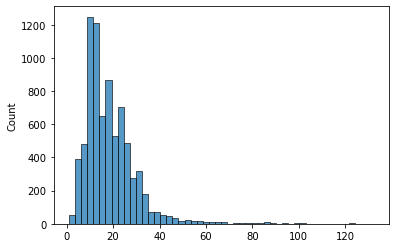

In [86]:
tox21_n_nodes_plot = sns.histplot(n_nodes, bins=50, legend=False)
tox21_n_nodes_plot.figure.savefig(
    "../data/MolNet_ecfp/tox21_n_nodes_distribution.jpg",
    dpi=300
)

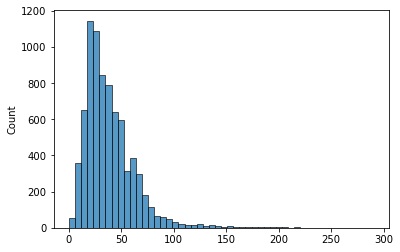

In [87]:
tox21_n_edges_plot = sns.histplot(n_edges, bins=50, legend=False)
tox21_n_edges_plot.figure.savefig(
    "../data/MolNet_ecfp/tox21_n_edges_distribution.jpg",
    dpi=300
)

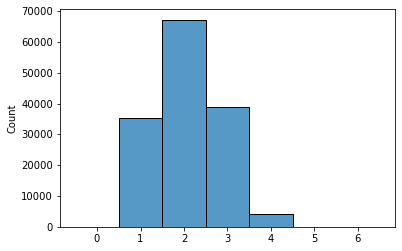

In [88]:
tox21_n_degrees_plot = sns.histplot(n_degrees, discrete=True, legend=False)
tox21_n_degrees_plot.figure.savefig(
    "../data/MolNet_ecfp/tox21_n_degrees_distribution.jpg",
    dpi=300
)

In [90]:
ds = CYP450(root="../data")
_, n_nodes, n_edges, n_degrees = get_statistics(ds)

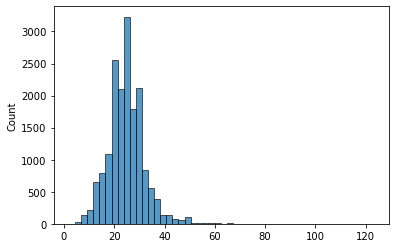

In [92]:
cyp_n_nodes_plot = sns.histplot(n_nodes, bins=50, legend=False)
cyp_n_nodes_plot.figure.savefig(
    "../data/cyp450_n_nodes_distribution.jpg",
    dpi=300
)

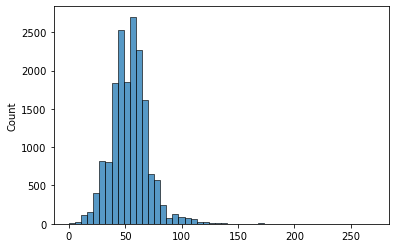

In [93]:
cyp_n_edges_plot = sns.histplot(n_edges, bins=50, legend=False)
cyp_n_edges_plot.figure.savefig(
    "../data/cyp450_n_edges_distribution.jpg",
    dpi=300
)

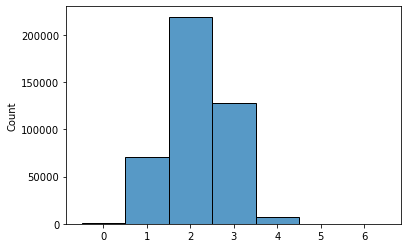

In [94]:
cyp_n_degrees_plot = sns.histplot(n_degrees, discrete=True, legend=False)
cyp_n_degrees_plot.figure.savefig(
    "../data/cyp450_n_degrees_distribution.jpg",
    dpi=300
)

In [3]:
ds = ChEMBL24(root="../data")
_, n_nodes, n_edges, n_degrees = get_statistics(ds)

  0%|          | 0/1739164 [00:00<?, ?it/s]

In [2]:
import pickle as pk
with open("../test_data/chembl_graph_statistics.pk", "rb") as f:
    # pk.dump({"n_nodes":n_nodes, "n_edges":n_edges, "n_degrees":n_degrees}, f)
    stats = pk.load(f)

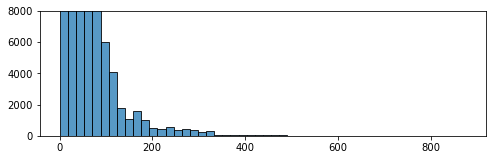

In [30]:
plt.rcParams["figure.figsize"] = (8, 2.3)
chembl_n_nodes_plot = sns.histplot(stats["n_nodes"], bins=50, legend=False)
plt.ylabel("")
plt.ylim(0, 0.008e6)
plt.savefig(
    "../data/chembl_n_nodes_distribution_bottom.jpg",
    dpi=300
)

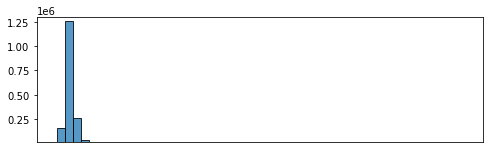

In [31]:
chembl_n_nodes_plot = sns.histplot(stats["n_nodes"], bins=50, legend=False)
plt.ylabel("")
plt.ylim(0.008e6, 1.3e6)
plt.xticks([])
plt.savefig(
    "../data/chembl_n_nodes_distribution_top.jpg",
    dpi=300
)

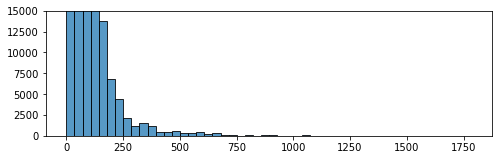

In [41]:
chembl_n_edges_plot = sns.histplot(stats["n_edges"], bins=50, legend=False)
plt.ylabel("")
plt.ylim(0, 0.015e6)
chembl_n_edges_plot.figure.savefig(
    "../data/chembl_n_edges_distribution_bottom.jpg",
    dpi=300
)

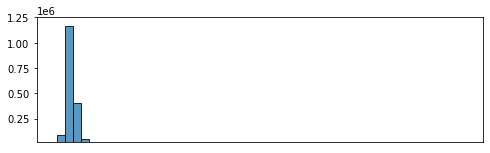

In [42]:
chembl_n_edges_plot = sns.histplot(stats["n_edges"], bins=50, legend=False)
plt.ylabel("")
plt.xticks([])
plt.ylim(0.015e6, 1.25e6)
chembl_n_edges_plot.figure.savefig(
    "../data/chembl_n_edges_distribution_top.jpg",
    dpi=300
)

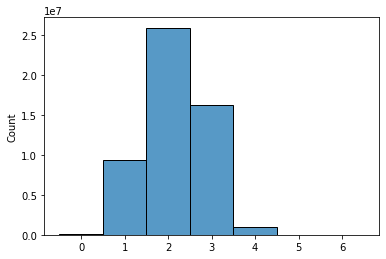

In [12]:
chembl_n_degrees_plot = sns.histplot(n_degrees, discrete=True, legend=False)
chembl_n_degrees_plot.figure.savefig(
    "../data/chembl_n_degrees_distribution.jpg",
    dpi=300
)